# Viewing events from numpy format

## Import modules

In [2]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

## Load event file and geometry file
Geometry file created with barrel_geo_dump.py in root_utils

In [7]:
file = np.load('/home/prouse/WatChMaL/DataTools/data/IWCDmPMT_varyE_e-_100-1000MeV_R0cm_1000evts_0.npz')
geofile = np.load('/home/prouse/WatChMaL/DataTools/data/barrelgeo.npz')

## Load event and get x, y, z, phi, time, charge of hits with nonzero charge

In [9]:
first_event = file['event_data'][0]
charge_all = first_event[:,:,0:19]
time_all = first_event[:,:,19:38]
x_all = geofile['geometry'][:,:,:,0]
y_all = geofile['geometry'][:,:,:,1]
z_all = geofile['geometry'][:,:,:,2]
print(charge_all.shape, x_all.shape)
has_charge = np.where(charge_all>0)
charge = charge_all[has_charge]
time = time_all[has_charge]
x = x_all[has_charge]
y = y_all[has_charge]
z = z_all[has_charge]
phi = np.arctan2(z, x)
print(phi.shape, y.shape, charge.shape)

(16, 40, 19) (16, 40, 19)
(1442,) (1442,) (1442,)


## Plot hits coloured by charge (unrolled view)

<IPython.core.display.Javascript object>


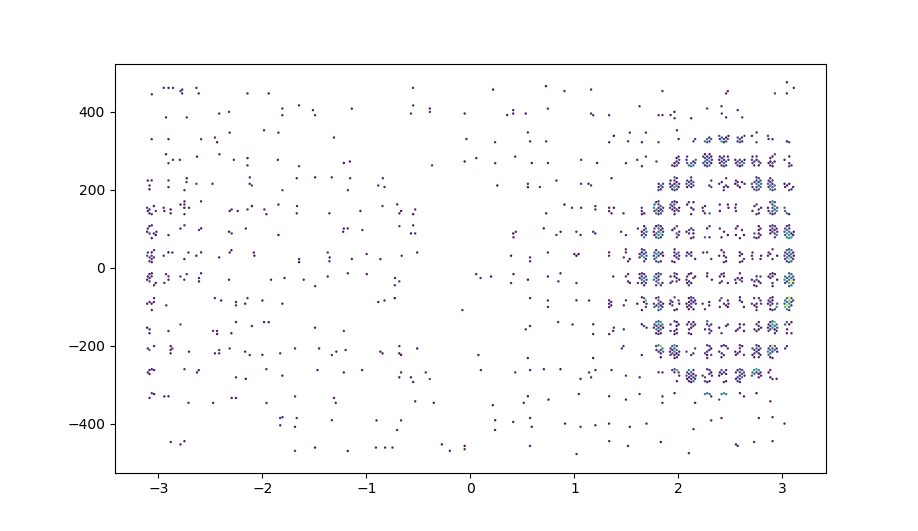

In [19]:
%matplotlib notebook
plt.scatter(phi, y, c=charge, s=0.5)

## Plot hits coloured by charge (3D view)

<IPython.core.display.Javascript object>


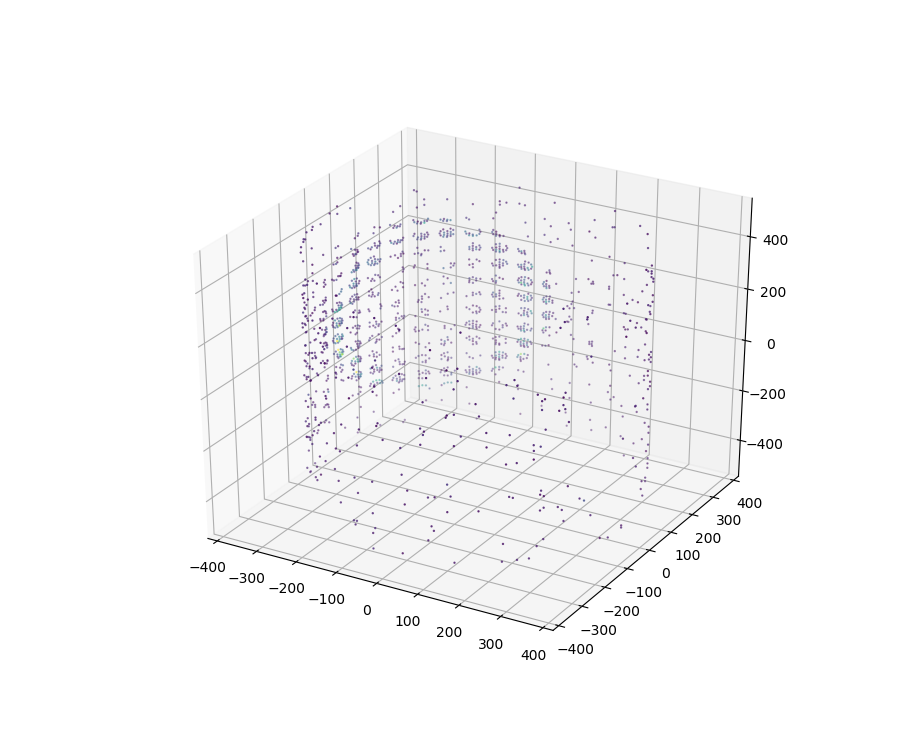

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, z, y, c=charge, s=0.5)

## Plot hits coloured by time (unrolled view)

<IPython.core.display.Javascript object>


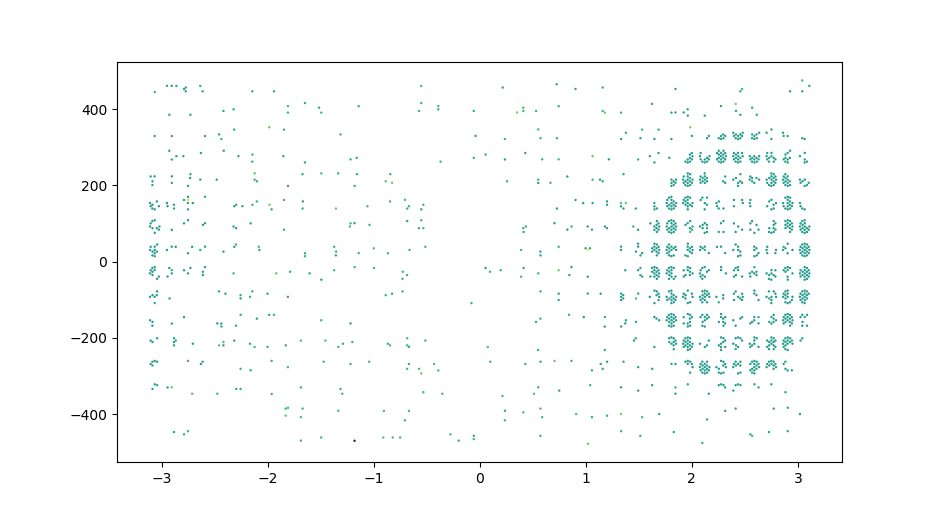

In [21]:
%matplotlib notebook
plt.scatter(phi, y, c=time, s=0.5)

## Plot hits coloured by time (3D view)

<IPython.core.display.Javascript object>


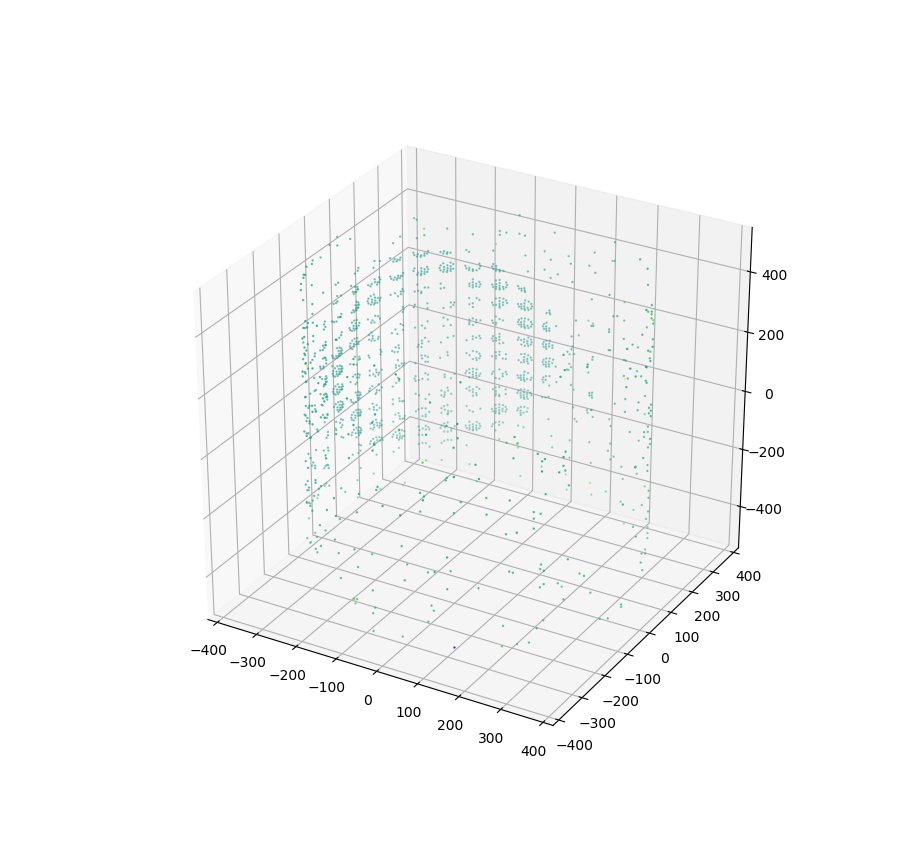

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, z, y, c=time, s=0.5)